# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Load Data from U.S. Fish & Wildlife Service

In [2]:
species = pd.read_pickle("../Data/fws.pkl")
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11737 entries, 0 to 13390
Data columns (total 7 columns):
Scientific Name           11737 non-null object
Common Name               11737 non-null object
Group                     11737 non-null object
Region                    11737 non-null object
Federal Listing Status    11737 non-null object
VIP                       11737 non-null object
State                     11737 non-null object
dtypes: object(7)
memory usage: 733.6+ KB


In [3]:
species.describe()

,Scientific Name,Common Name,Group,Region,Federal Listing Status,VIP,State
count,11737,11737,11737,11737,11737,11737,11737
unique,7116,5217,20,9,3,3,50
top,Accipiter gentilis,No common name,Flowering Plants,1,Not Listed,P,CA
freq,44,1807,6288,3904,9040,6492,1697


In [4]:
species.head()

,Scientific Name,Common Name,Group,Region,Federal Listing Status,VIP,State
0,Accipiter gentilis,Northern goshawk,Birds,2,Not Listed,V,AL
1,Acipenser fulvescens,Lake sturgeon,Fishes,3,Not Listed,V,AL
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Fishes,4,Threatened,V,AL
3,Agarodes alabamensis,[Unnamed] caddisfly,Insects,4,Not Listed,I,AL
4,Agrimonia incisa,Incised groovebur,Flowering Plants,4,Not Listed,P,AL


### Target Distribution

Federal Listing Status
Endangered    1899
Not Listed    9040
Threatened     798
Name: Federal Listing Status, dtype: int64
Endangered: 0.16179602964982534
Not Listed: 0.7702138536252876
Threatened: 0.06799011672488711


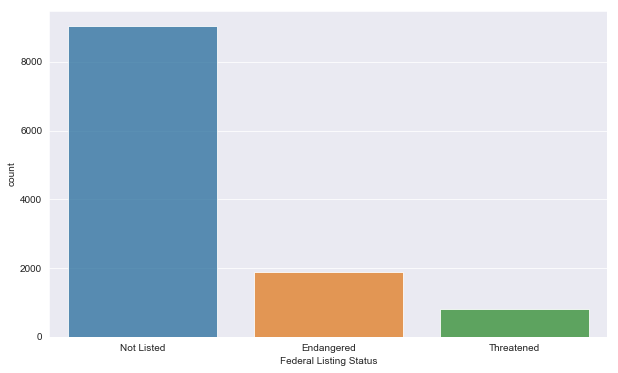

In [5]:
# federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())
print('Endangered: ' + str((species['Federal Listing Status'] == 'Endangered').sum() / species.shape[0]))
print('Not Listed: ' + str((species['Federal Listing Status'] == 'Not Listed').sum() / species.shape[0]))
print('Threatened: ' + str((species['Federal Listing Status'] == 'Threatened').sum() / species.shape[0]))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(species['Federal Listing Status'],
              order=species['Federal Listing Status'].value_counts().index,
              alpha=0.8)

### Feature Distribution

Group
Amphibians                   143
Annelid Worms                  4
Arachnids                     50
Birds                        681
Clams                        497
Conifers and Cycads           20
Corals                         2
Crustaceans                  226
Ferns and Allies             158
Fishes                       733
Flatworms and Roundworms       9
Flowering Plants            6288
Hydroids                       1
Insects                     1460
Lichens                       26
Mammals                      661
Millipedes                     1
Reptiles                     283
Snails                       487
Sponges                        7
Name: Group, dtype: int64
Group
Amphibians                  0.012184
Annelid Worms               0.000341
Arachnids                   0.004260
Birds                       0.058022
Clams                       0.042345
Conifers and Cycads         0.001704
Corals                      0.000170
Crustaceans                 0.019255
Ferns 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

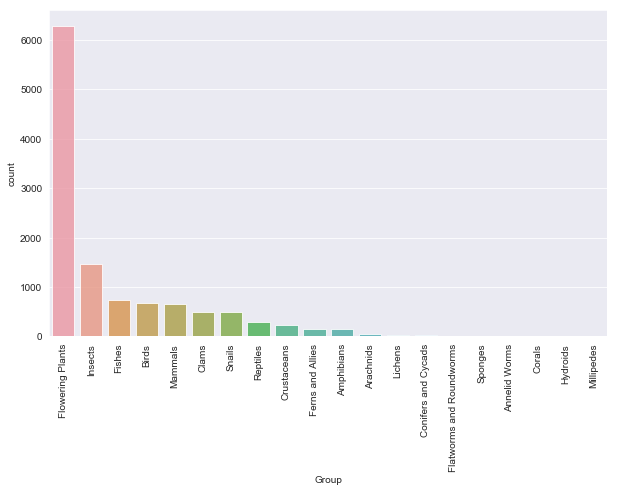

In [6]:
# species groups
print(species.groupby('Group')['Group'].count())

# percentage
print(species.groupby('Group')['Group'].count()/species.groupby('Group')['Group'].count().sum())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Group'],
              order=species['Group'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

Region
1       3904
2       1271
3       1071
4       2790
5        989
6       1053
7         83
8        519
NMFS      57
Name: Region, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

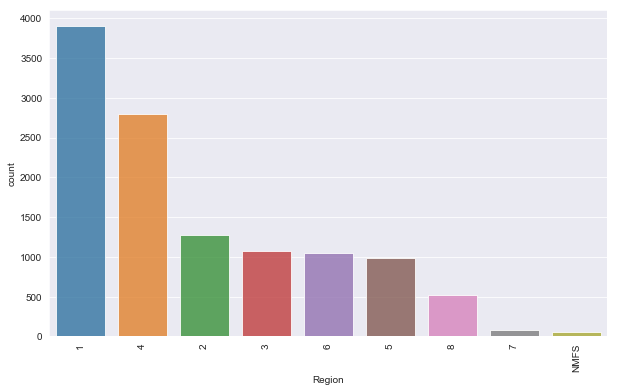

In [7]:
# lead geographic regions
print(species.groupby('Region')['Region'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['Region'],
              order=species['Region'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

VIP
I    2744
P    6492
V    2501
Name: VIP, dtype: int64


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

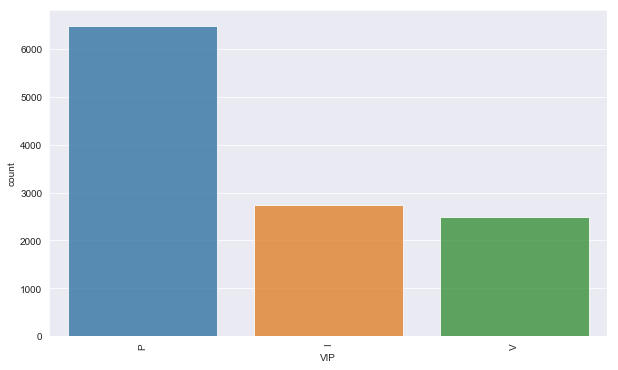

In [8]:
# vertebrate / invertebrate / plants
print(species.groupby('VIP')['VIP'].count())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['VIP'],
              order=species['VIP'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)

State
AK      88
AL     453
AR     165
AZ     433
CA    1697
CO     216
CT      52
DE      83
FL     495
GA     332
HI    1480
IA      75
ID     175
IL     141
IN     124
KS      66
KY     180
LA     103
MA      78
MD      97
ME      64
MI     102
MN      88
MO     142
MS     138
MT      91
NC     359
ND      32
NE      49
NH      55
NJ      83
NM     247
NV     439
NY     122
OH     114
OK      97
OR     445
PA     125
RI      32
SC     174
SD      46
TN     333
TX     521
UT     426
VA     254
VT      43
WA     223
WI     101
WV     129
WY     130
Name: State, dtype: int64
State
AK    0.007498
AL    0.038596
AR    0.014058
AZ    0.036892
CA    0.144585
CO    0.018403
CT    0.004430
DE    0.007072
FL    0.042174
GA    0.028287
HI    0.126097
IA    0.006390
ID    0.014910
IL    0.012013
IN    0.010565
KS    0.005623
KY    0.015336
LA    0.008776
MA    0.006646
MD    0.008264
ME    0.005453
MI    0.008690
MN    0.007498
MO    0.012098
MS    0.011758
MT    0.007753
NC    0.030587
ND    0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

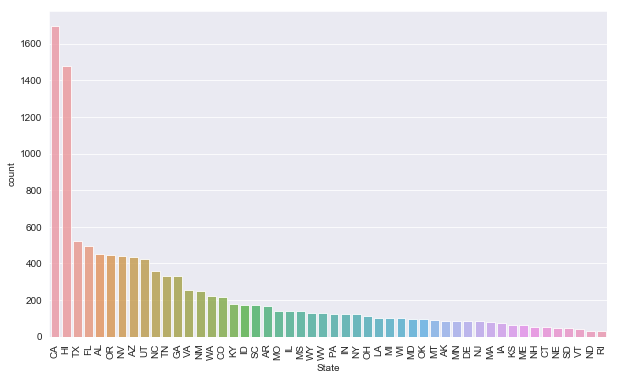

In [9]:
# states
print(species.groupby('State')['State'].count())

# percentage
print(species.groupby('State')['State'].count()/species.groupby('State')['State'].count().sum())

fig, aa = plt.subplots(figsize=(10,6))
sns.countplot(species['State'],
              order=species['State'].value_counts().index,
              alpha=0.8)
plt.xticks(rotation=90)